In [68]:
import matplotlib.pyplot as plt 

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [70]:
model = Sequential()
model.add(Dense(20, input_dim = 2, activation = 'sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy')   #binary_crossentropy二分损失函数 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


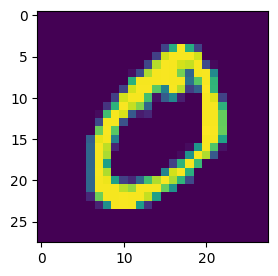

In [71]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
img1 = x_train[1]
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)

In [29]:
import pandas as pd 
import numpy as np
data = pd.read_csv("datasets/Binary_Classification_Dataset.csv")
data.head()

,Feature_1,Feature_2,Label
0,1.764052,0.400157,1
1,0.978738,2.240893,1
2,1.867558,-0.977278,1
3,0.950088,-0.151357,1
4,-0.103219,0.410599,1


In [31]:
#X = data.drop(['Diagnosis'],axis=1)  #去除最后的一列
#这里因为变量过多，先简化为两列
X = data.loc[:,['Feature_1','Feature_2']]
y = data.loc[:,'Label']
X.head()

,Feature_1,Feature_2
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599


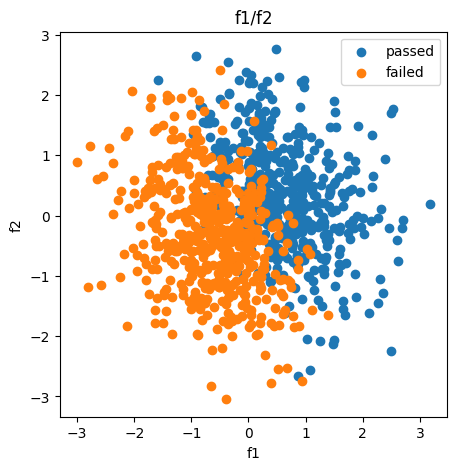

In [32]:
# show the original data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
passed = plt.scatter(X.loc[:,'Feature_1'][y == 1],X.loc[:,'Feature_2'][y == 1])
failed = plt.scatter(X.loc[:,'Feature_1'][y == 0],X.loc[:,'Feature_2'][y == 0])
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1/f2')
plt.show()

In [33]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 10) #random state is like seed, aimming to keep the random result same,every time you run this code
print(x_train.shape,x_test.shape,X.shape)

(670, 2) (330, 2) (1000, 2)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units= 20 ,input_dim = 2, activation = 'sigmoid'))      #输入层
mlp.add(Dense(units = 1, input_dim = 20, activation = 'sigmoid'))    #输出层 sigmoid 适用于单分类
mlp.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [35]:
# complile the model
mlp.compile(optimizer='adam',loss = 'binary_crossentropy')

In [36]:
# train the model
mlp.fit(x_train,y_train,epochs = 3000)

Epoch 1/3000
21/21 [==============================] - 0s 835us/step - loss: 0.7789
Epoch 2/3000
21/21 [==============================] - 0s 819us/step - loss: 0.7259
Epoch 3/3000
21/21 [==============================] - 0s 852us/step - loss: 0.6896
Epoch 4/3000
21/21 [==============================] - 0s 872us/step - loss: 0.6623
Epoch 5/3000
21/21 [==============================] - 0s 820us/step - loss: 0.6444
Epoch 6/3000
21/21 [==============================] - 0s 873us/step - loss: 0.6286
Epoch 7/3000
21/21 [==============================] - 0s 767us/step - loss: 0.6151
Epoch 8/3000
21/21 [==============================] - 0s 783us/step - loss: 0.6027
Epoch 9/3000
21/21 [==============================] - 0s 530us/step - loss: 0.5909
Epoch 10/3000
21/21 [==============================] - 0s 608us/step - loss: 0.5788
Epoch 11/3000
21/21 [==============================] - 0s 525us/step - loss: 0.5674
Epoch 12/3000
21/21 [==============================] - 0s 573us/step - loss: 0.5560
E

In [40]:
#make prediction and calculate the accuracy
y_train_predict = mlp.predict_classes(x_train)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.8865671641791045


In [41]:
y_test_predict =mlp.predict_classes(x_test)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.8848484848484849


In [61]:
# generate data for the plot
xx,yy = np.meshgrid(np.arange(-3,3,0.01),np.arange(-3,3,0.01))
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range = mlp.predict_classes(x_range)
print(type(y_range))
print(y_range.shape)    #2-dim, n行1列的二维数组，需要进行转换

<class 'numpy.ndarray'>
(360000, 1)


In [64]:
# format the output
y_range_form = pd.Series(i[0] for i in y_range)
y_range = y_range.reshape(360000,)
print (y_range_form)
print(type(x_range))
print(x_range.shape)

0         0
1         0
2         0
3         0
4         0
         ..
359995    1
359996    1
359997    1
359998    1
359999    1
Length: 360000, dtype: int32
<class 'numpy.ndarray'>
(360000, 2)


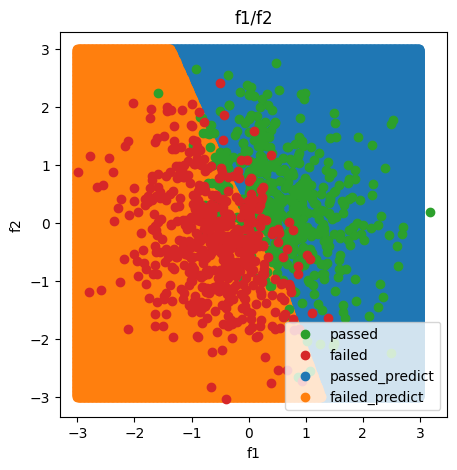

In [67]:
#plot the figure
%matplotlib inline
from matplotlib import pyplot as plt
fig2 = plt.figure(figsize=(5,5))
passed_predict = plt.scatter(x_range[:,0][y_range_form == 1],x_range[:,1][y_range_form == 1])
failed_predict = plt.scatter(x_range[:,0][y_range_form == 0],x_range[:,1][y_range_form == 0])
# 注意图层顺序
passed = plt.scatter(X.loc[:,'Feature_1'][y == 1],X.loc[:,'Feature_2'][y == 1])
failed = plt.scatter(X.loc[:,'Feature_1'][y == 0],X.loc[:,'Feature_2'][y == 0])

plt.legend((passed,failed,passed_predict,failed_predict),('passed','failed','passed_predict','failed_predict'))
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1/f2')
plt.show()

In [22]:
import tensorflow
tensorflow.__version__


'2.2.0'